# Challenge 1
## Team 16
## University Ranking dataset



### Libraries

In [425]:
# Libraries: Standard ones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Library for boxplots
import seaborn as sns

# Standardize features by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler

# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
from sklearn.decomposition import PCA

# K-means function
from sklearn.cluster import KMeans

from scipy import cluster

# Function to standardize the data 
from sklearn.preprocessing import scale

# Functions for silhouette
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [426]:
def plot_corr(corr):
    # https://seaborn.pydata.org/examples/many_pairwise_correlations.html
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    sns.heatmap(corr, mask=mask, cmap=cmap)
               

In [427]:
# Load the data: Word University
university = pd.read_csv("Word_University_Rank_2020.csv",  encoding='utf-8')

### Data preprocessing

We start by replacing some incorrect characters and dropping two incomplete rows.

In [428]:
university['Overall_Ranking'] = university['Overall_Ranking'].str.replace('�','-')
university['Country'] = university['Country'].str.replace('�','*')
university['Rank_Char'] = university['Rank_Char'].str.replace('�','-')
university['Number_students'] = university['Number_students'].str.replace(',','')
university['International_Students'] = university['International_Students'].str.replace('%','')
university['International_Students'].replace('', np.nan, inplace=True)
university.dropna(subset=['International_Students'], inplace=True)
university['Percentage_Female'] = university['Percentage_Female'].str.replace('%','')
university['Percentage_Male'] = university['Percentage_Male'].str.replace('%','')

In [429]:
university

,Rank_Char,Score_Rank,University,Country,Number_students,Numb_students_per_Staff,International_Students,Percentage_Female,Percentage_Male,Teaching,Research,Citations,Industry_Income,International_Outlook,Score_Result,Overall_Ranking
0,1,1,University of Oxford,United Kingdom,20664,11.2,41,46,54,90.5,99.6,98.4,65.5,96.4,95.4,95.40
1,2,2,California Institute of Technology,United States,2240,6.4,30,34,66,92.1,97.2,97.9,88.0,82.5,94.5,94.50
2,3,3,University of Cambridge,United Kingdom,18978,10.9,37,47,53,91.4,98.7,95.8,59.3,95.0,94.4,94.40
3,4,4,Stanford University,United States,16135,7.3,23,43,57,92.8,96.4,99.9,66.2,79.5,94.3,94.30
4,5,5,Massachusetts Institute of Technology,United States,11247,8.6,34,39,61,90.5,92.4,99.5,86.9,89.0,93.6,93.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391,1001+,531,Cear� State University,Brazil,20174,17.8,0,55,45,16.2,8.3,6.1,35.6,16.3,11.3,10.7-22.1
1392,1001+,532,Pontifical Catholic University of Minas Gerais,Brazil,34101,21.3,0,57,43,15.3,7.7,6.7,35.1,19.4,11.2,10.7-22.1
1393,1001+,533,Bashkir State University,Russian Federation,15236,11.1,3,63,37,17.0,8.1,4.5,36.9,16.7,11.1,10.7-22.1
1394,1001+,534,University of Caxias do Sul,Brazil,17101,24.9,0,54,46,13.8,7.8,7.6,35.0,17.7,11.0,10.7-22.1


In [430]:
university.describe() # Statistical summary of the data

,Score_Rank,Numb_students_per_Staff,Teaching,Research,Citations,Industry_Income,International_Outlook,Score_Result
count,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000
mean,315.108321,18.973458,28.245768,24.000789,48.142468,46.493042,47.136872,34.815782
std,140.926421,16.846575,14.152835,17.541616,27.734382,16.279852,23.296978,16.946222
min,1.000000,0.900000,11.200000,6.800000,1.700000,34.400000,13.100000,10.700000
25%,212.000000,12.325000,18.400000,11.600000,23.400000,35.800000,27.500000,21.000000
50%,336.000000,16.400000,23.850000,18.050000,45.650000,39.400000,43.100000,31.600000
75%,437.000000,21.900000,33.600000,30.100000,72.050000,49.875000,62.800000,44.500000
max,535.000000,493.500000,92.800000,99.600000,100.000000,100.000000,99.700000,95.400000


We create a boxplot to visualize our numerical data and find outliers  

In [431]:
numerical_cols = ['Score_Rank', 'Number_students', 'Numb_students_per_Staff', 'International_Students', 'Percentage_Male',
                  'Percentage_Female','Teaching','Research', 'Citations', 'Industry_Income', 'International_Outlook', 'Score_Result']
university[numerical_cols] = university[numerical_cols].apply(pd.to_numeric)

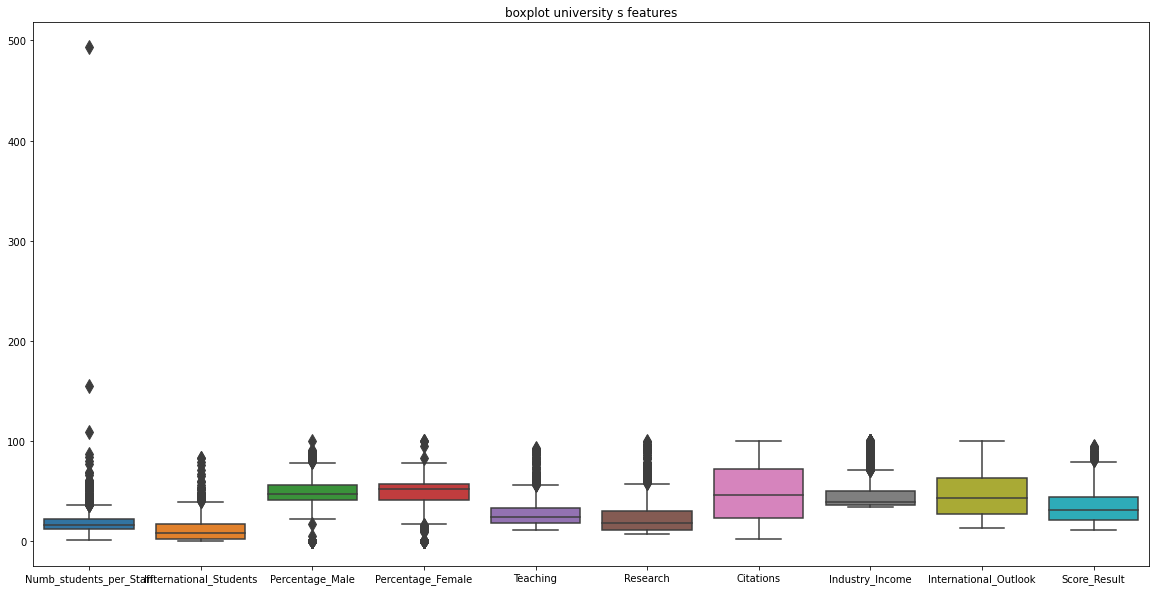

In [432]:
# Boxplot for university
plt.figure(figsize=(20, 10))
plt.title('boxplot university s features')
food_box=sns.boxplot(data=university[numerical_cols].drop(['Score_Rank', 'Number_students'], axis=1),fliersize=10) # fliersize is the size used to indicate the outliers
plt.show()

We do not find any significant outliers except for the Numb_students_per_Staff column, so we remove it

In [433]:
outlier_id = university[university['Numb_students_per_Staff'] > 100].index
university.loc[outlier_id]

,Rank_Char,Score_Rank,University,Country,Number_students,Numb_students_per_Staff,International_Students,Percentage_Female,Percentage_Male,Teaching,Research,Citations,Industry_Income,International_Outlook,Score_Result,Overall_Ranking
355,351-400,214,TU Dortmund University,Germany,34267,108.8,10,45,55,37.6,41.4,54.2,45.8,42.2,44.3,42.4-44.4
1050,1001+,437,University of South Africa,South Africa,193874,155.2,7,67,33,22.1,19.1,15.0,35.2,43.7,21.0,10.7-22.1
1084,1001+,447,Anadolu University,Turkey,830104,493.5,1,37,63,13.0,24.1,16.5,100.0,17.3,19.9,10.7-22.1


In [434]:
university.drop(outlier_id, inplace=True)

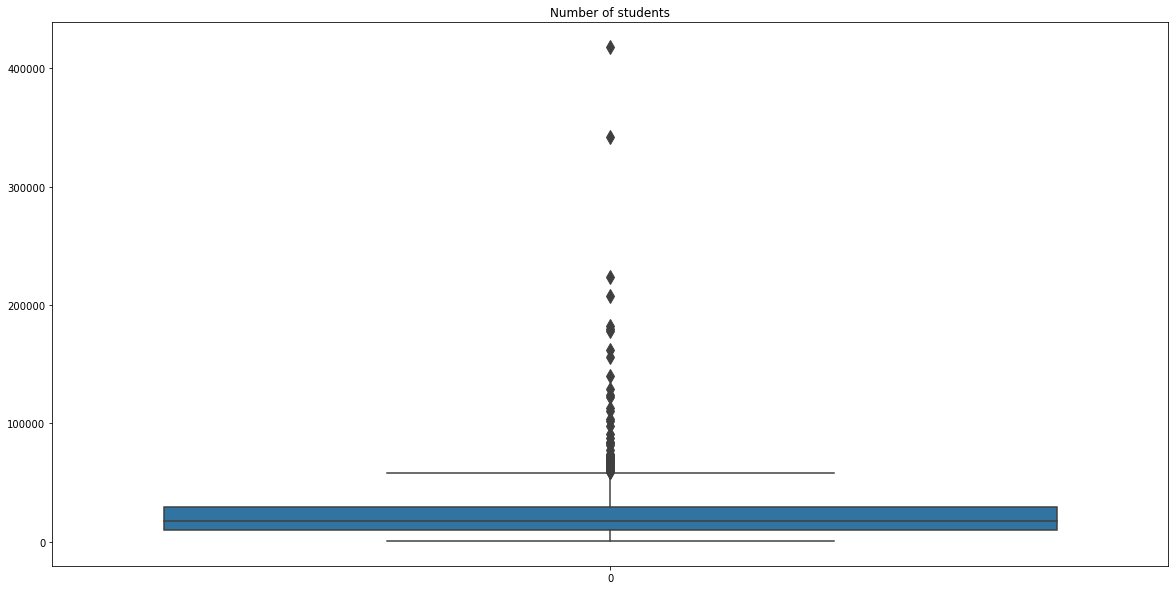

In [435]:
# Boxplot for university
plt.figure(figsize=(20, 10))
plt.title('Number of students')
food_box=sns.boxplot(data=university['Number_students'],fliersize=10) # fliersize is the size used to indicate the outliers
plt.show()

Something similar happens in the Number_students column

In [436]:
index_num_students = university[university['Number_students'] > 300000].index
university.loc[index_num_students]

,Rank_Char,Score_Rank,University,Country,Number_students,Numb_students_per_Staff,International_Students,Percentage_Female,Percentage_Male,Teaching,Research,Citations,Industry_Income,International_Outlook,Score_Result,Overall_Ranking
1126,1001+,456,Tribhuvan University,Nepal,418053,36.0,0,45,55,11.4,6.9,30.8,34.4,45.8,19.0,10.7-22.1
1233,1001+,482,Al-Azhar University,Egypt,342151,32.6,6,45,55,15.2,8.3,16.5,34.5,46.7,16.4,10.7-22.1


In [437]:
university.drop(index_num_students, inplace=True)

In [438]:
university.describe()

,Score_Rank,Number_students,Numb_students_per_Staff,International_Students,Percentage_Female,Percentage_Male,Teaching,Research,Citations,Industry_Income,International_Outlook,Score_Result
count,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.00000,1389.000000,1389.000000
mean,314.776818,22512.138949,18.447012,11.388049,47.508279,47.740101,28.275954,24.015335,48.220014,46.48049,47.165659,34.854284
std,140.949346,20170.444788,10.138835,11.787743,16.072807,16.107062,14.157633,17.555421,27.739567,16.23651,23.324549,16.953474
min,1.000000,558.000000,0.900000,0.000000,0.000000,0.000000,11.200000,6.800000,1.700000,34.40000,13.100000,10.700000
25%,211.000000,10247.000000,12.300000,2.000000,41.000000,41.000000,18.400000,11.600000,23.400000,35.80000,27.500000,21.100000
50%,336.000000,17793.000000,16.300000,8.000000,52.000000,47.000000,23.900000,18.000000,45.900000,39.40000,43.100000,31.600000
75%,436.000000,29311.000000,21.800000,17.000000,57.000000,56.000000,33.600000,30.100000,72.200000,49.90000,62.900000,44.600000
max,535.000000,223275.000000,86.600000,83.000000,100.000000,100.000000,92.800000,99.600000,100.000000,100.00000,99.700000,95.400000


Same boxplot without the outlier

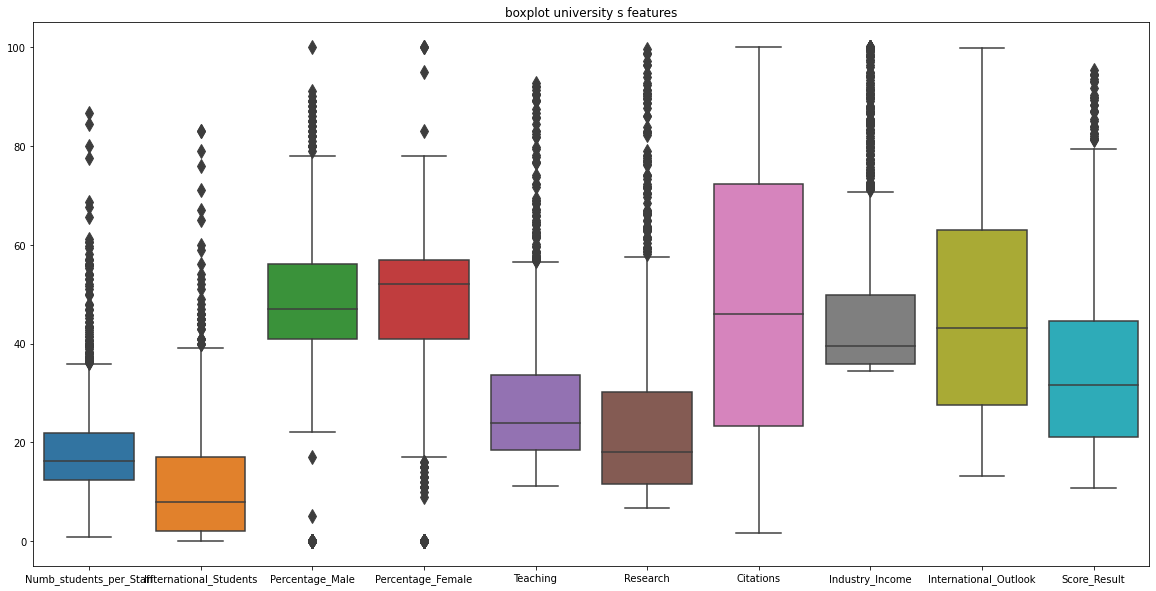

In [439]:
# Boxplot for university
plt.figure(figsize=(20, 10))
plt.title('boxplot university s features')
food_box=sns.boxplot(data=university[numerical_cols].drop(['Score_Rank', 'Number_students'], axis=1),fliersize=10) # fliersize is the size used to indicate the outliers
plt.show()

In [440]:
# Que te esta indicando el boxplot??? Se deberian de eliminar los demas outliers??

### Correlation
Before creating the correlation matrix, it is important to decide which columns to analyze.

These are the columns of the dataset and their explanation.

- Rank_Char: ranking according to The Times Higher Education
- ScoreRank: ranking according to the column "Scoreresult"
- University: name of the university.
- Country: country of the university.
- Number_students: number of students.
- Numbstudentsper_Staff: ratio between the number of students and the staff.
- International_Students: percentage of international students.
- Percentage_Female: percentage of women.
- Percentage_Male: percentage of men.
- Overall_Ranking. Ranking according to The Times Higher Education
- Teaching: score in teaching.
- Research: score in research.
- Citations: score in citations.
- Industry_Income: score in industry income.
- International_Outlook: score in international outlook.
- ScoreResult: resulting score: (30% teaching, 30% research, 30% citations, 7.5% international outlook, 2.5% IndustryIncome). This variable has been calculated according to the aforementioned weights.

In [441]:
university.columns

Index(['Rank_Char', 'Score_Rank', 'University', 'Country', 'Number_students',
       'Numb_students_per_Staff', 'International_Students',
       'Percentage_Female', 'Percentage_Male', 'Teaching', 'Research',
       'Citations', 'Industry_Income', 'International_Outlook', 'Score_Result',
       'Overall_Ranking'],
      dtype='object')

- **Rank_Char** depends on **Overall_Ranking** and Overal_Ranking is not taken into account because the column does not have the exact ranking for all universities since most of them have a interval.
- **University** and **Country** are not considered because they are string columns
- **ScoreRank** is derived from **ScoreResult** and ScoreResult depends on Teaching, Research, Citations, International_Outlook and Indutry_Income. 
- **Percentage_Female** and **Percentage_Male** can be seen as only one variable, they should add up to 100, however there are some rows that do not make it.

In [442]:
## Explicar porque no se toman en cuenta las variables dependientes

In [443]:
(university['Percentage_Female'] + university['Percentage_Male']).value_counts()

100    1323
0        66
dtype: int64

We remove those rows

In [444]:
empty_gender_index = university[(university['Percentage_Male'] == 0) & (university['Percentage_Female'] == 0)].index
university.drop(empty_gender_index, inplace=True)

In [445]:
university['Percentage_Female'] = university['Percentage_Female']/100
# Habria que intentar dividir los scores que van de 0-100 a 0-1

Now the **Percentage_Female** column means:

1 - all students are females

0 - all students are males

In [446]:
selected_columns = ['Number_students', 'Numb_students_per_Staff', 'International_Students', 'Percentage_Female',
                    'Teaching','Research', 'Citations', 'Industry_Income', 'International_Outlook']

In [447]:
university_selected = university[selected_columns].copy()

In [448]:
university_selected

,Number_students,Numb_students_per_Staff,International_Students,Percentage_Female,Teaching,Research,Citations,Industry_Income,International_Outlook
0,20664,11.2,41,0.46,90.5,99.6,98.4,65.5,96.4
1,2240,6.4,30,0.34,92.1,97.2,97.9,88.0,82.5
2,18978,10.9,37,0.47,91.4,98.7,95.8,59.3,95.0
3,16135,7.3,23,0.43,92.8,96.4,99.9,66.2,79.5
4,11247,8.6,34,0.39,90.5,92.4,99.5,86.9,89.0
...,...,...,...,...,...,...,...,...,...
1391,20174,17.8,0,0.55,16.2,8.3,6.1,35.6,16.3
1392,34101,21.3,0,0.57,15.3,7.7,6.7,35.1,19.4
1393,15236,11.1,3,0.63,17.0,8.1,4.5,36.9,16.7
1394,17101,24.9,0,0.54,13.8,7.8,7.6,35.0,17.7


#### Correlation

In [449]:
university_selected.corr()

,Number_students,Numb_students_per_Staff,International_Students,Percentage_Female,Teaching,Research,Citations,Industry_Income,International_Outlook
Number_students,1.000000,0.257078,-0.121050,0.127989,0.029508,0.049259,0.011884,-0.039063,-0.032291
Numb_students_per_Staff,0.257078,1.000000,-0.016508,0.101046,-0.136438,0.027200,0.048297,0.049761,0.070539
International_Students,-0.121050,-0.016508,1.000000,0.091568,0.411505,0.500105,0.442423,0.177230,0.827491
Percentage_Female,0.127989,0.101046,0.091568,1.000000,-0.057531,-0.034093,0.146880,-0.276531,0.218491
Teaching,0.029508,-0.136438,0.411505,-0.057531,1.000000,0.898046,0.537705,0.443185,0.377924
Research,0.049259,0.027200,0.500105,-0.034093,0.898046,1.000000,0.606889,0.516045,0.527340
Citations,0.011884,0.048297,0.442423,0.146880,0.537705,0.606889,1.000000,0.195908,0.587484
Industry_Income,-0.039063,0.049761,0.177230,-0.276531,0.443185,0.516045,0.195908,1.000000,0.174173
International_Outlook,-0.032291,0.070539,0.827491,0.218491,0.377924,0.527340,0.587484,0.174173,1.000000


#### Heatmap

/tmp/ipykernel_5587/458547156.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


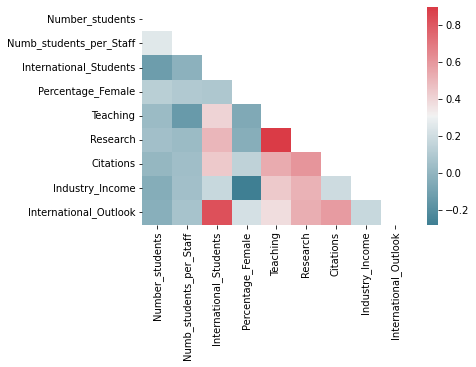

In [450]:
plot_corr(university_selected.corr())

From the above heat map we can observe that there is a high correlation between **International_Outlook** and **International_Students** (0.82), and between **Research** and **Teaching** (0.89). In addition, it can be observed that there is a significant negative correlation between **Industry_Income** and **Percentage_Female**.

It is also possible to observe a slight correlation between **Teaching** and **Research** and **Citations**, **Industry_Income** and **International_Outlook**, as well as a slight negative correlation between **Numb_students_per_Staff** and **Teaching**.


### Principal Component Analysis
First we standarize the features and then apply PCA

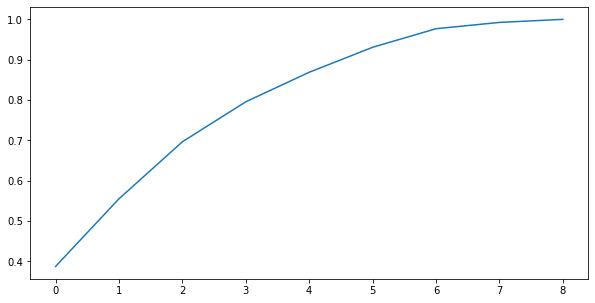

In [451]:
X = university_selected.values

std_scale = StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

pca = PCA().fit(X_scaled)
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [452]:
pca.explained_variance_ratio_

array([0.38735492, 0.16772123, 0.14136547, 0.0991554 , 0.0732372 ,
       0.06188211, 0.04608849, 0.01558227, 0.00761291])

In [453]:
np.cumsum(pca.explained_variance_ratio_)

array([0.38735492, 0.55507615, 0.69644162, 0.79559702, 0.86883422,
       0.93071633, 0.97680482, 0.99238709, 1.        ])

From the graph above we can see that at least 3 components are needed to explain more than 60% of the variance and with 2 only 55% of the variance is explained.

Although only two PCA components do not explain all the variance, we consider it pertinent to plot them.

In [454]:
X_proj = pca.transform(X_scaled)

Text(0, 0.5, '2nd principal component')

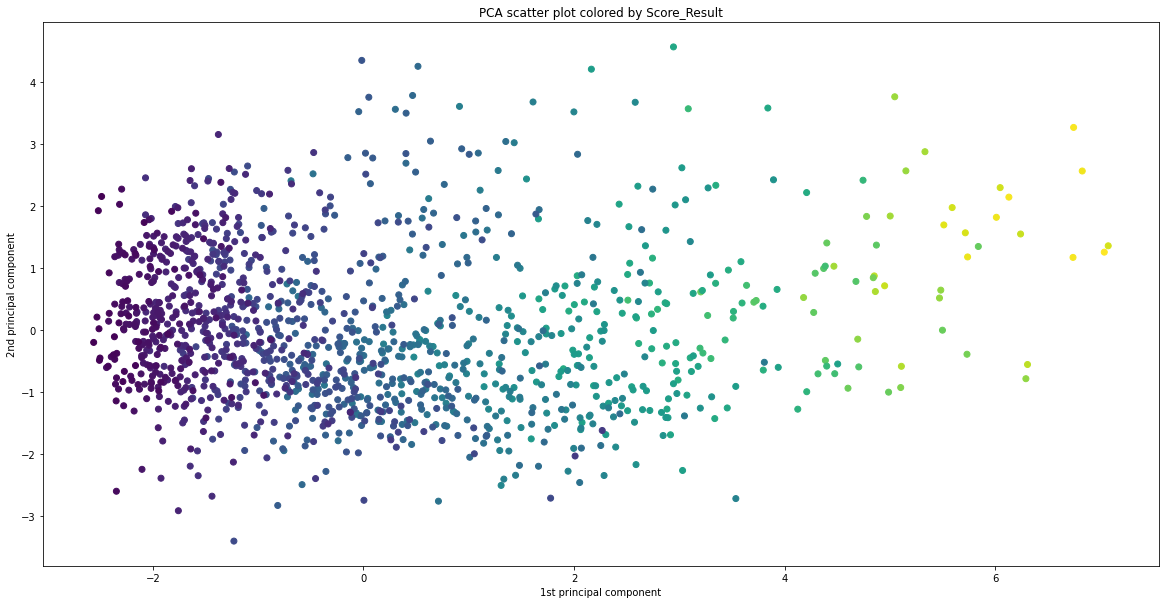

In [455]:
plt.figure(figsize=(20, 10))
plt.title('PCA scatter plot colored by Score_Result')
plt.scatter(X_proj[:,0], X_proj[:,1], c=university['Score_Result'])
plt.xlabel('1st principal component')
plt.ylabel('2nd principal component')

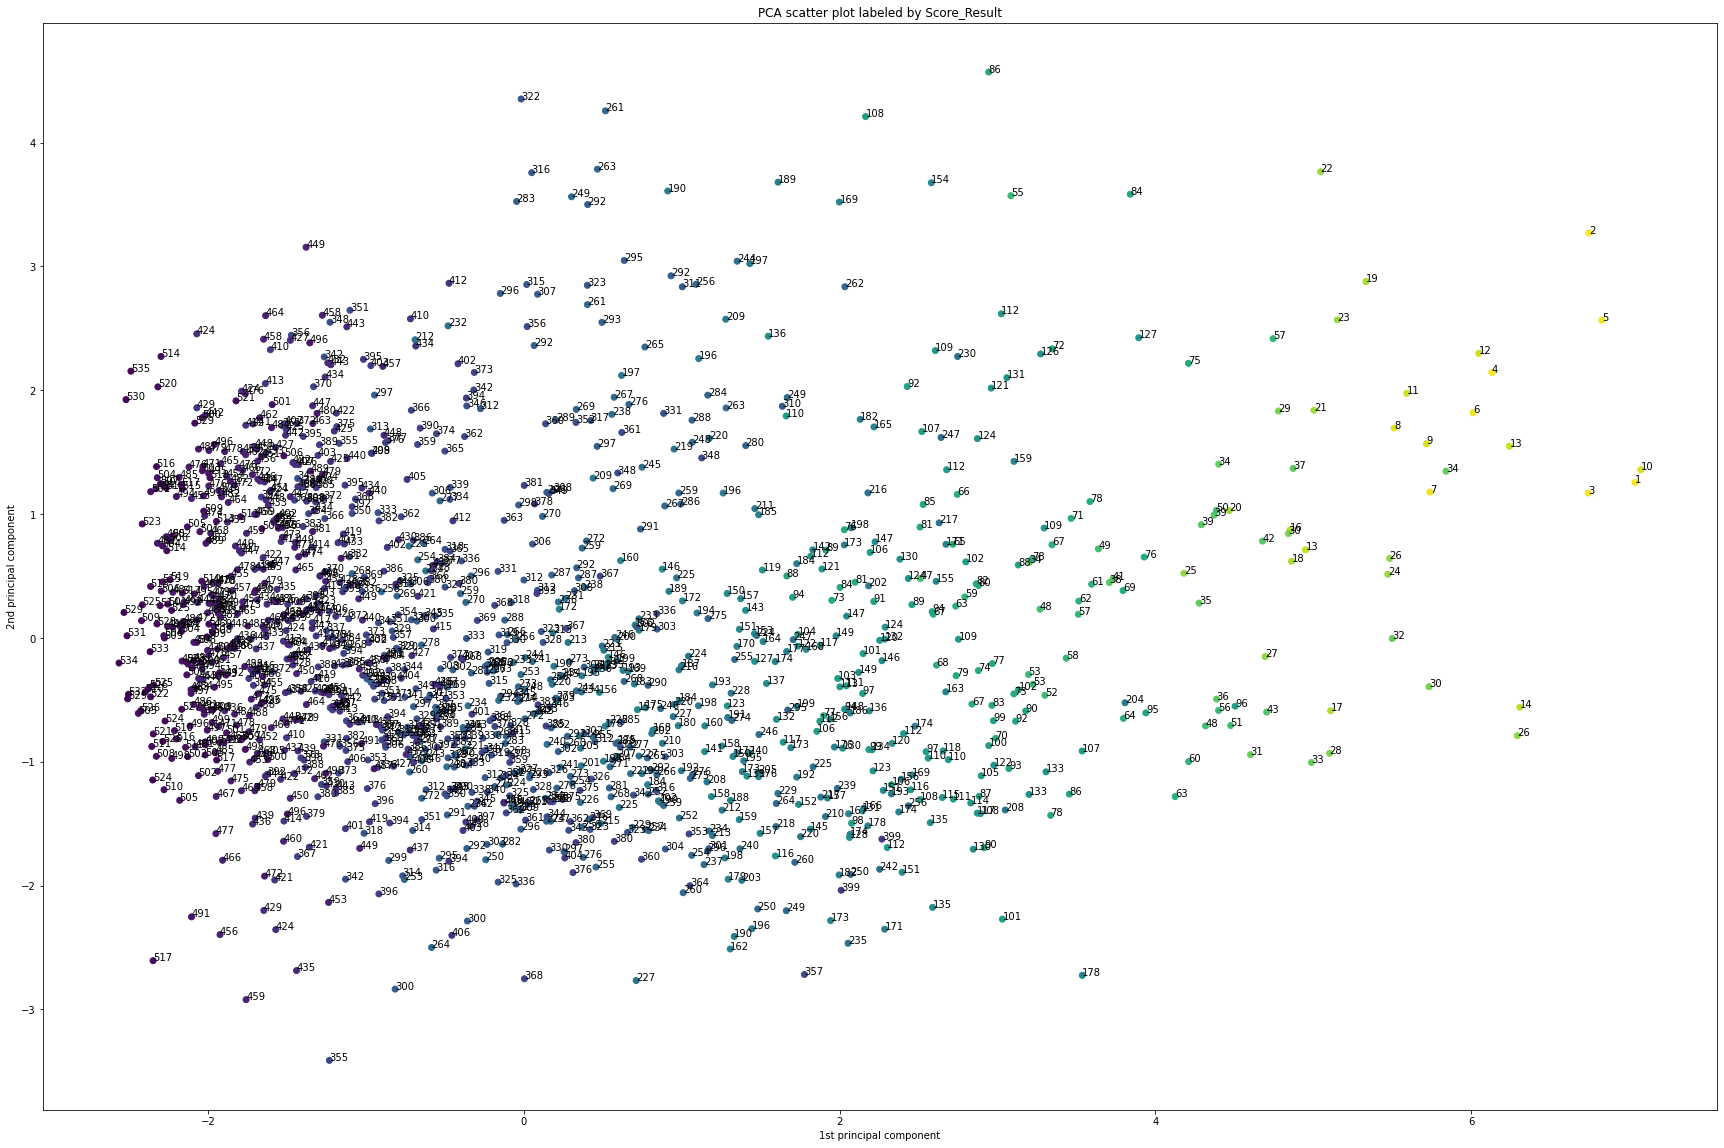

In [456]:
plt.figure(figsize=(30, 20))
plt.scatter(X_proj[:,0], X_proj[:,1], c=university['Score_Result'])
plt.title('PCA scatter plot labeled by Score_Result')
plt.xlabel('1st principal component')
plt.ylabel('2nd principal component')

for i in range(X_proj.shape[0]):
    plt.text(X_proj[i,0], X_proj[i,1], university['Score_Rank'].reset_index(drop = True).loc[i])

From the above scatter plots we can get some information:

To no one's surprise, we can see that schools with similar rankings are closer to each other. However, the higher the schools are ranked, the further apart they are from each other.


### T-SNE
t-Distributed Stochastic Neighbor Embedding is another method of dimensionality reduction as PCA but more suitable for visualization


In [457]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X_scaled)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1323 samples in 0.002s...
[t-SNE] Computed neighbors for 1323 samples in 0.089s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1323
[t-SNE] Computed conditional probabilities for sample 1323 / 1323
[t-SNE] Mean sigma: 0.750962
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.264595
[t-SNE] KL divergence after 300 iterations: 1.206242


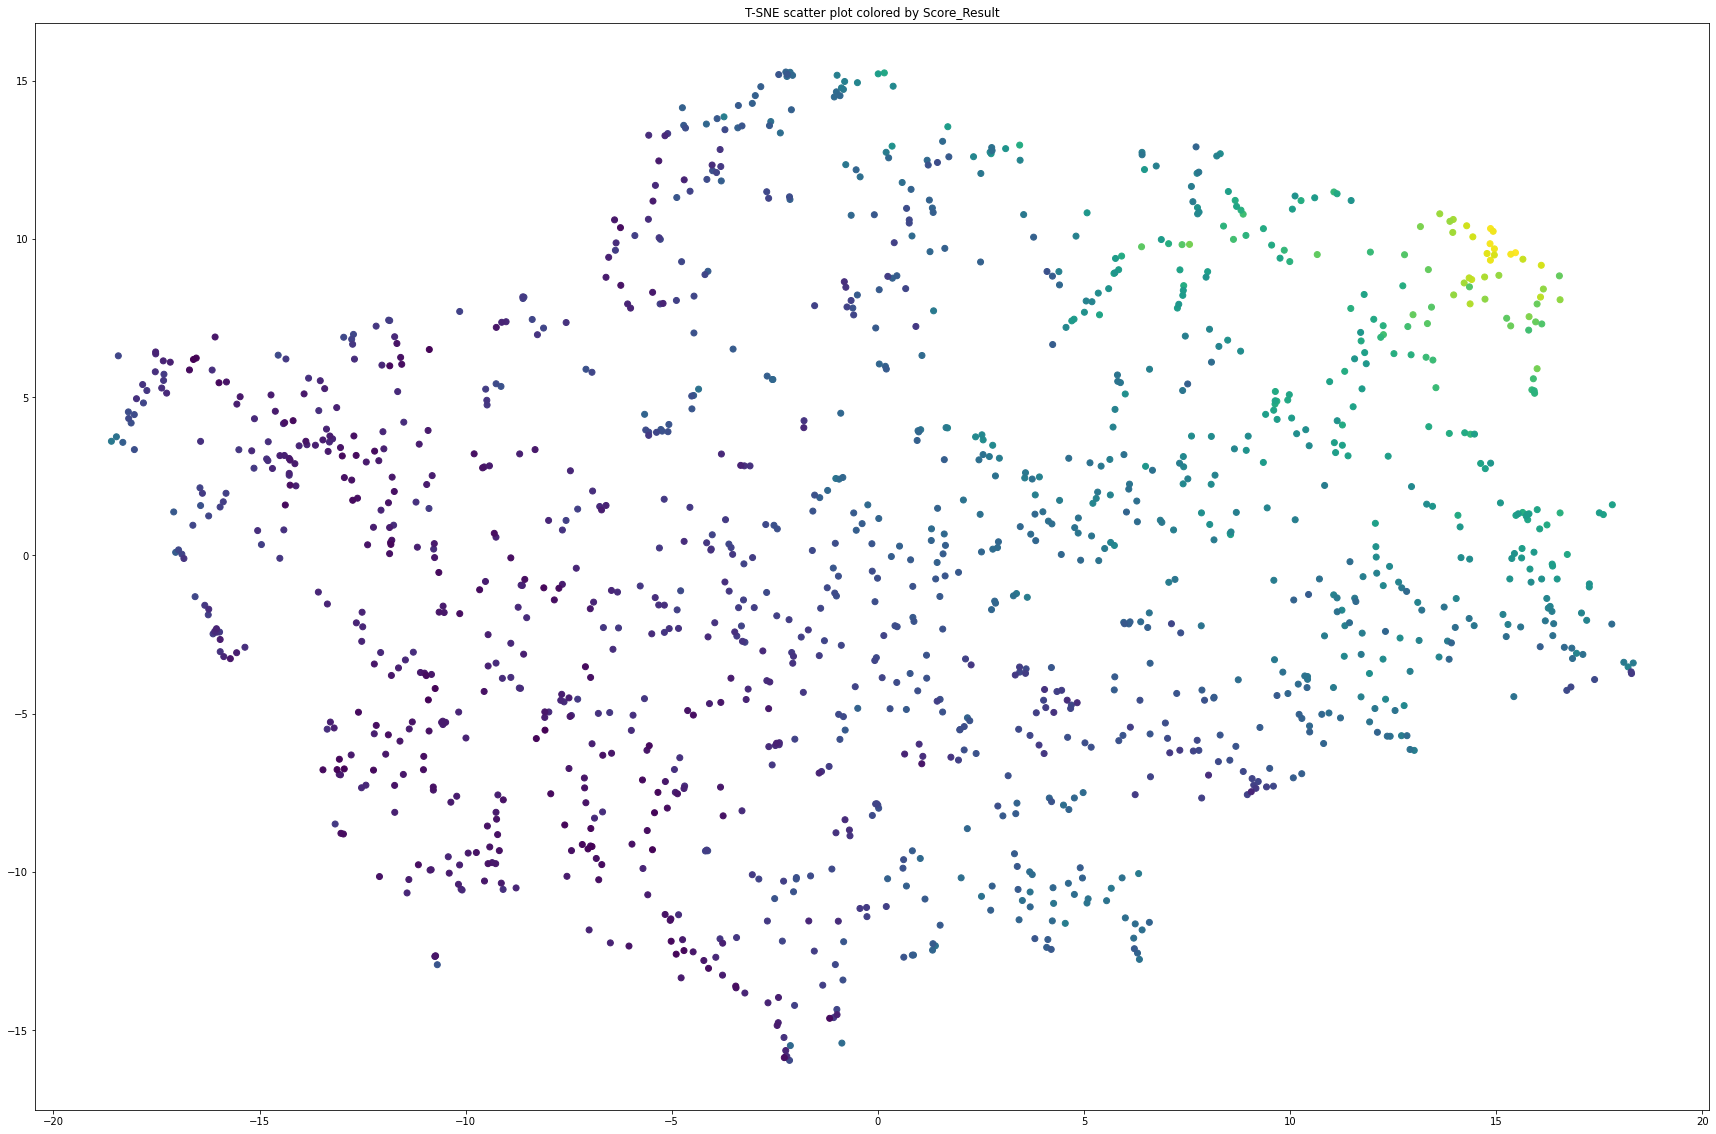

In [458]:
plt.figure(figsize=(30, 20))
plt.title('T-SNE scatter plot colored by Score_Result')
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=university['Score_Result'])

A similar result can be observed with T-SNE, universities with similar rankings are closer to each other. 

### K-means

In [459]:
university_kmeans = university_selected.copy() #university_selected.copy()

In [460]:
# We apply K-means algorithm and calculate Silhouette index for a given number of clusters
# (Remark: it is a little difficult to visualize, since it is dimension 5)
range_n_clusters = range(2, 15)
for n in range_n_clusters:
    kmeans_uni = KMeans(n_clusters=n, n_init=40).fit(university_kmeans) # Clustering with the given number of clusters
    cluster_labels = kmeans_uni.labels_ # Extract the labels
    silhouette_avg = silhouette_score(university_kmeans, cluster_labels) # Corresponding silhouette score
   
    # Display the results
    print("For n =", n, "Silhouette_score:", silhouette_avg)

For n = 2 Silhouette_score: 0.6679439308728957
For n = 3 Silhouette_score: 0.6178474563609601
For n = 4 Silhouette_score: 0.587432988902312
For n = 5 Silhouette_score: 0.5541017938540161
For n = 6 Silhouette_score: 0.5537113642954732
For n = 7 Silhouette_score: 0.5369435929802928
For n = 8 Silhouette_score: 0.5367267775320453
For n = 9 Silhouette_score: 0.5286002402754894
For n = 10 Silhouette_score: 0.5365366598908649
For n = 11 Silhouette_score: 0.5360448286041621
For n = 12 Silhouette_score: 0.5331419790180159
For n = 13 Silhouette_score: 0.5335430615099058
For n = 14 Silhouette_score: 0.530002014263383


In [461]:
# We run a K-means algorithm onto the ruspini dataset, and display the centers
kmeans = KMeans(n_clusters=2,n_init=40,init='random')
y = kmeans.fit_predict(university_selected)

In [462]:
university_kmeans['Cluster'] = y

In [463]:
np.array(np.unique(y, return_counts=True)).T

array([[   0,  174],
       [   1, 1149]])

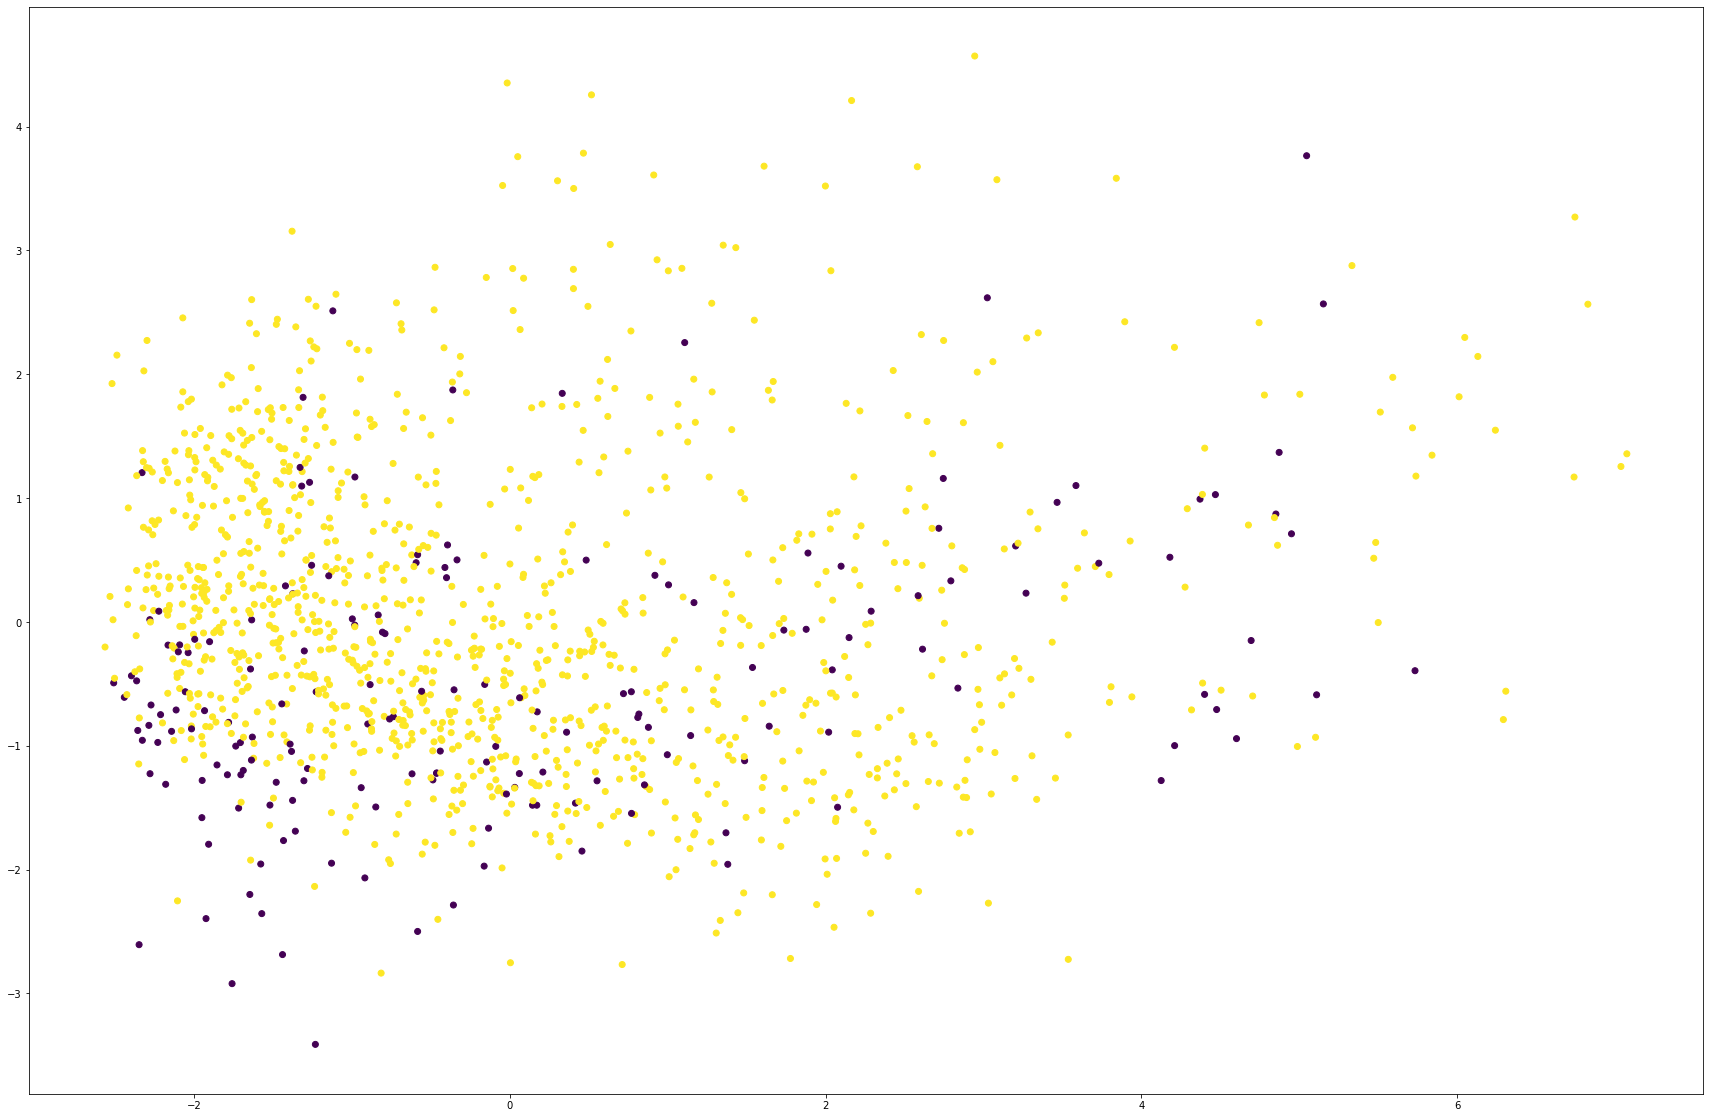

In [464]:
plt.figure(figsize=(30, 20))
plt.scatter(X_proj[:,0], X_proj[:,1], c=university_kmeans['Cluster'])

Hola no paremos

### Hierchical clustering

In [465]:
university_hclustering = university_selected.copy()
university_scaled = pd.DataFrame(scale(university_hclustering),columns=university_hclustering.columns,index=university_hclustering.index)  # scale(food) returns a numpy array, so use pd.Dataframe to reconstruct your dataframe
university_scaled

,Number_students,Numb_students_per_Staff,International_Students,Percentage_Female,Teaching,Research,Citations,Industry_Income,International_Outlook
0,-0.085663,-0.722641,2.512506,-0.313733,4.493979,4.381827,1.816616,1.232445,2.110499
1,-1.014972,-1.194543,1.581069,-1.284464,4.608964,4.243469,1.798589,2.653214,1.515234
2,-0.170705,-0.752135,2.173802,-0.232839,4.558658,4.329942,1.722877,0.840944,2.050545
3,-0.314106,-1.106061,0.988336,-0.556416,4.659270,4.197349,1.870696,1.276647,1.386759
4,-0.560658,-0.978254,1.919774,-0.879993,4.493979,3.966752,1.856275,2.583754,1.793595
...,...,...,...,...,...,...,...,...,...
1391,-0.110379,-0.073776,-0.959215,0.414316,-0.845628,-0.881550,-1.511131,-0.655599,-1.319773
1392,0.592101,0.270320,-0.959215,0.576104,-0.910307,-0.916139,-1.489498,-0.687171,-1.187016
1393,-0.359452,-0.732472,-0.705186,1.061470,-0.788136,-0.893080,-1.568816,-0.573510,-1.302644
1394,-0.265381,0.624246,-0.959215,0.333421,-1.018106,-0.910374,-1.457050,-0.693486,-1.259819


In [466]:
Z = linkage(university_scaled, 'ward') # 'average' is the method used to compute the distance. Metric is "euclidian" by default
print(Z)

[[1.15700000e+03 1.19000000e+03 1.01676345e-01 2.00000000e+00]
 [1.07600000e+03 1.10300000e+03 2.55238744e-01 2.00000000e+00]
 [1.02500000e+03 1.04600000e+03 2.62730022e-01 2.00000000e+00]
 ...
 [2.62900000e+03 2.63700000e+03 4.02290217e+01 3.41000000e+02]
 [2.64000000e+03 2.64100000e+03 4.49667649e+01 9.82000000e+02]
 [2.64200000e+03 2.64300000e+03 7.11577567e+01 1.32300000e+03]]


From the siluhet section we decide to divide the dendogram in 2 clusters

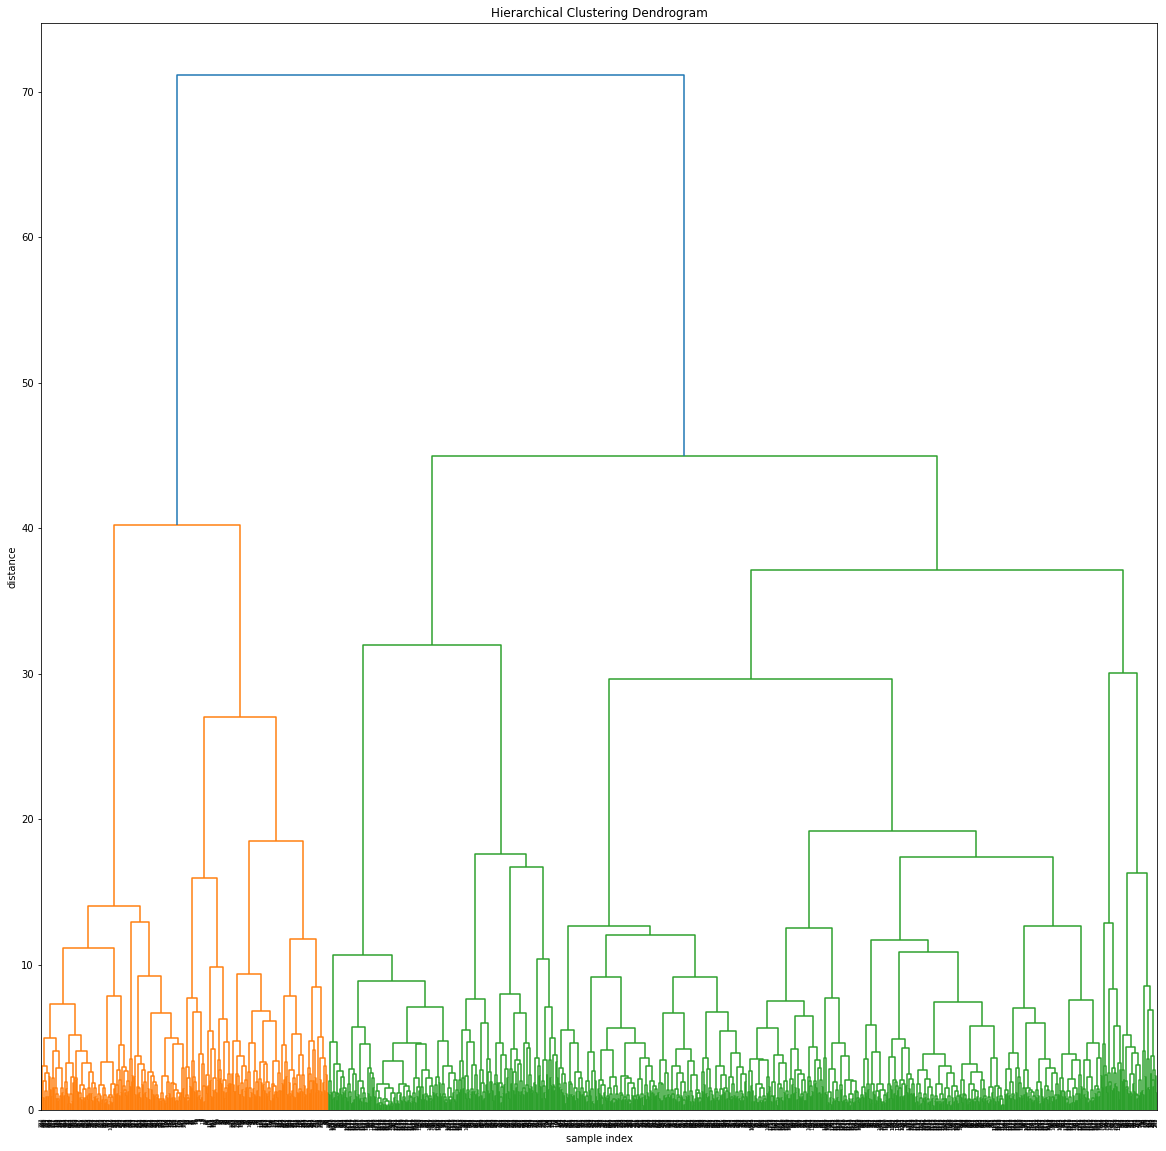

In [467]:
plt.figure(figsize=(20, 20))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z = linkage(university_scaled, 'ward'),
    
)
plt.show()

In [487]:
cutree = cluster.hierarchy.cut_tree(Z, height=50)
university_hclustering['hcluster'] = cutree

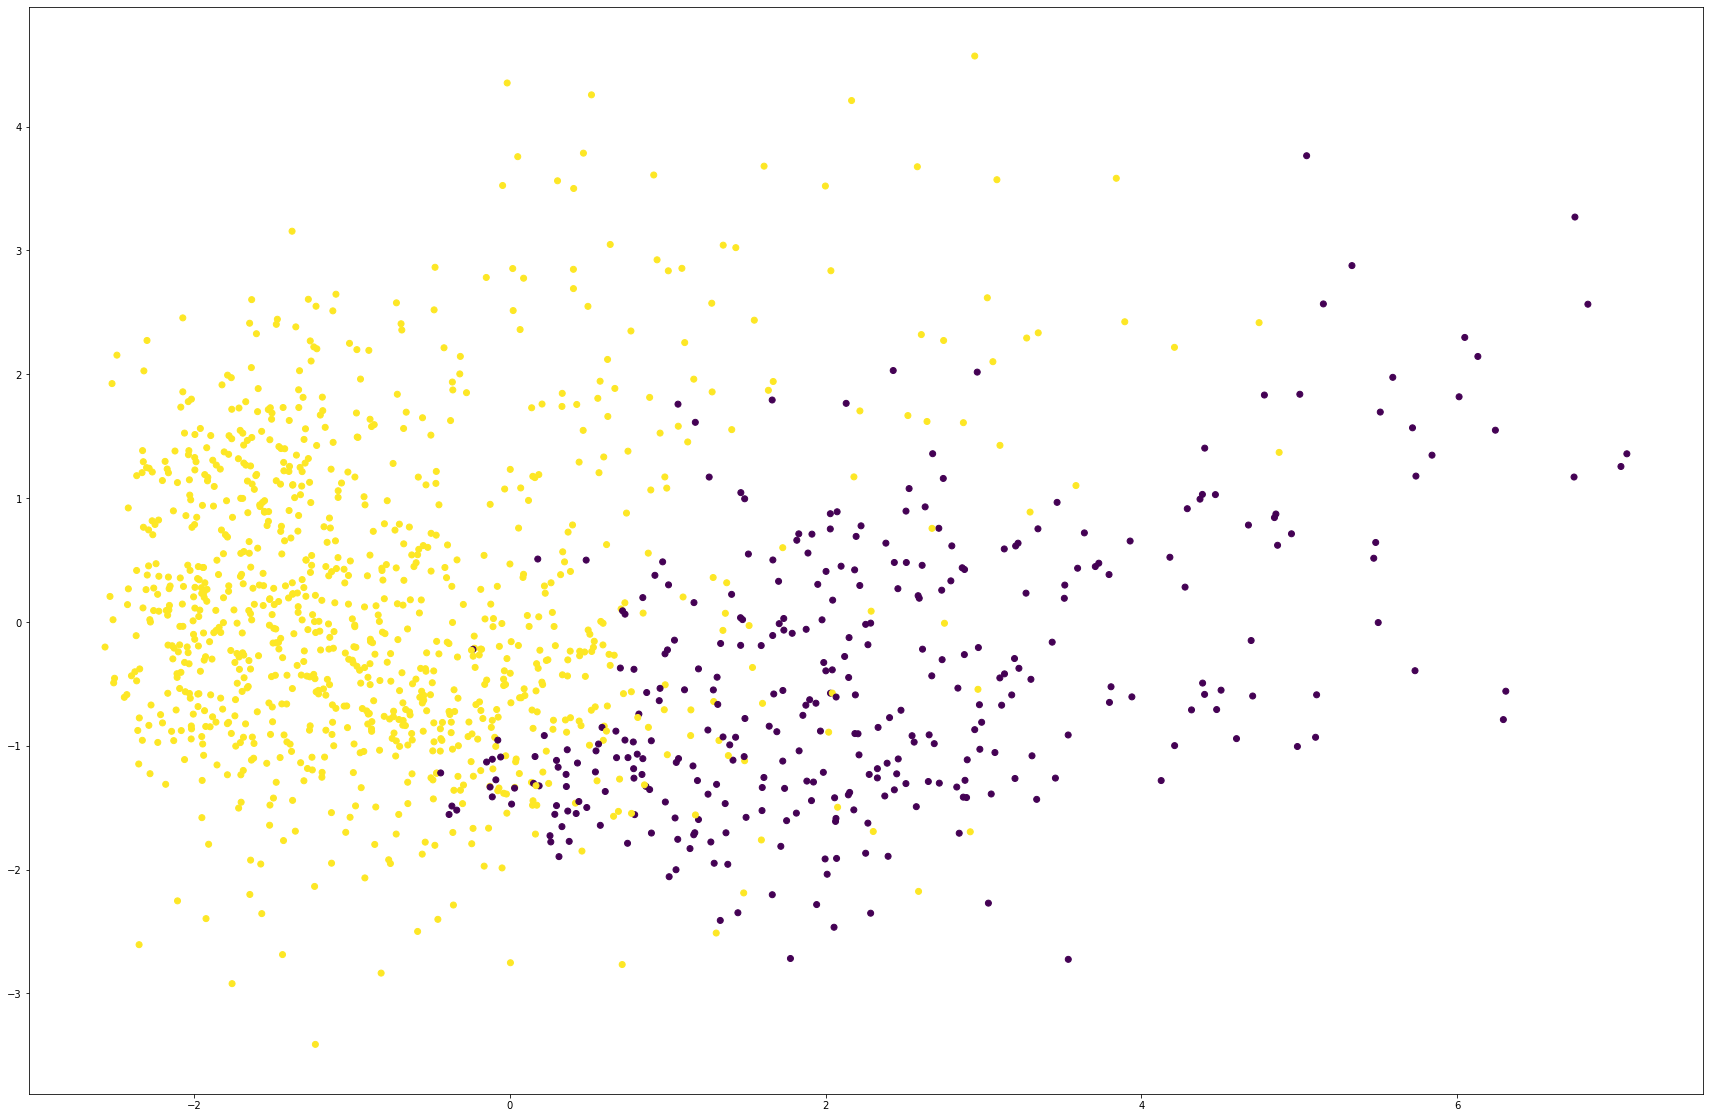

In [488]:
plt.figure(figsize=(30, 20))
plt.scatter(X_proj[:,0], X_proj[:,1], c=university_hclustering['hcluster'])

,Number_students,Numb_students_per_Staff,International_Students,Percentage_Female,Teaching,Research,Citations,Industry_Income,International_Outlook,hcluster
0,20664,11.2,41,0.46,90.5,99.6,98.4,65.5,96.4,0
1,2240,6.4,30,0.34,92.1,97.2,97.9,88.0,82.5,0
2,18978,10.9,37,0.47,91.4,98.7,95.8,59.3,95.0,0
3,16135,7.3,23,0.43,92.8,96.4,99.9,66.2,79.5,0
4,11247,8.6,34,0.39,90.5,92.4,99.5,86.9,89.0,0
...,...,...,...,...,...,...,...,...,...,...
910,15687,20.4,21,0.61,15.8,13.3,35.0,34.5,65.3,0
919,19975,18.1,23,0.62,16.0,10.3,37.4,34.6,62.8,0
923,10808,20.0,34,0.62,16.9,13.6,29.3,34.9,77.1,0
1012,9489,20.4,22,0.62,16.8,11.3,23.3,35.2,75.0,0


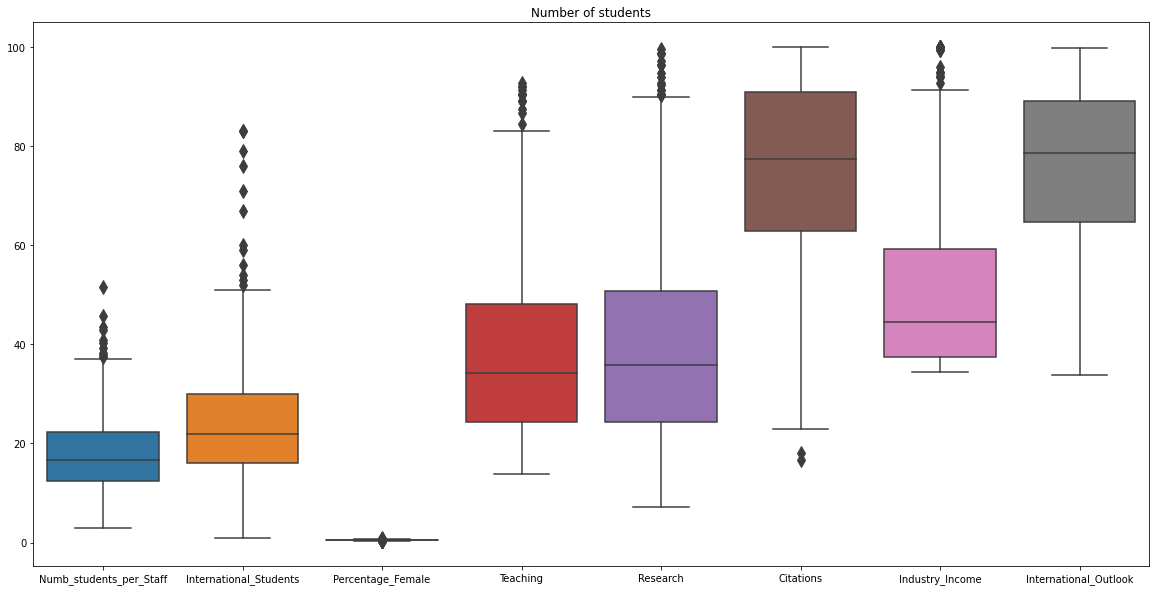

In [496]:
# Boxplot for university
plt.figure(figsize=(20, 10))
plt.title('Number of students')
food_box=sns.boxplot(data=university_hclustering[university_hclustering['hcluster'] == 0].drop(['Number_students', 'hcluster'], axis = 1),fliersize=10) # fliersize is the size used to indicate the outliers
plt.show()

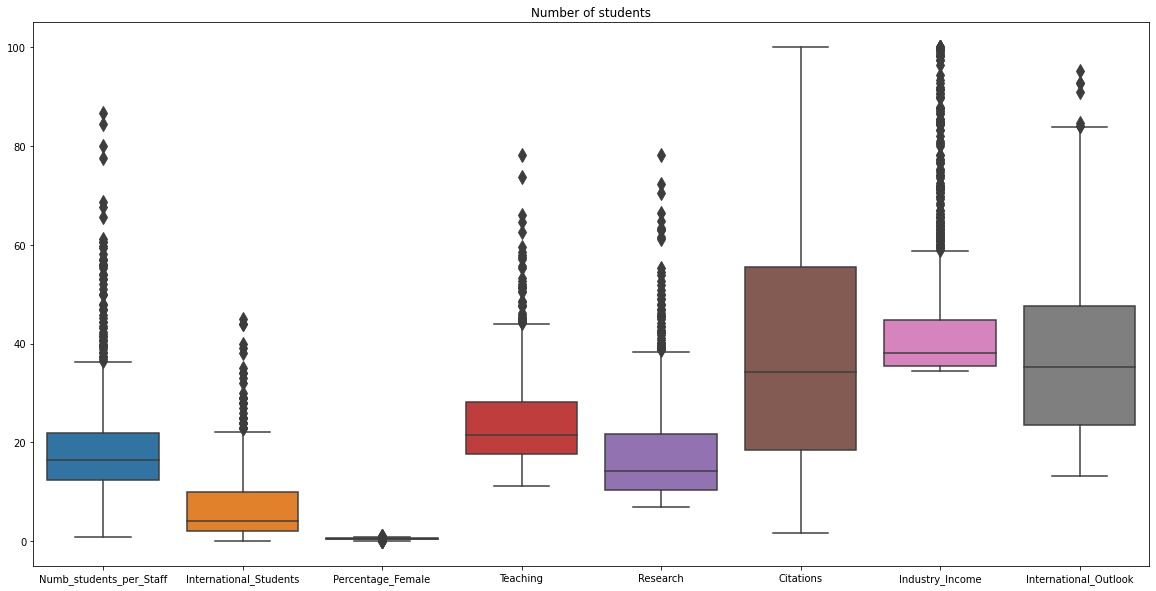

In [497]:
# Boxplot for university
plt.figure(figsize=(20, 10))
plt.title('Number of students')
food_box=sns.boxplot(data=university_hclustering[university_hclustering['hcluster'] == 1].drop(['Number_students', 'hcluster'], axis = 1),fliersize=10) # fliersize is the size used to indicate the outliers
plt.show()

### Conclusions